In [1]:
from azure.cosmosdb.table.tableservice import TableService
from azure.storage.blob import BlockBlobService
from azure.cosmosdb.table.models import Entity
from azure.storage.file import ContentSettings
import sys
from time import time
import json
from PIL import Image
import requests
import numpy as np
import pandas as pd

In [2]:
with open('api_key.json', 'r') as f:
    app_key = json.loads(f.read())
table_service = TableService(connection_string=app_key['azure_storage_connection'])

In [8]:
entities = table_service.query_entities('nuknuk', filter="PartitionKey eq 'nyuknyuk'")

In [15]:
entity = entities.items[200]

In [16]:
entity

{'FilePath': 'https://urbanlist.blob.core.windows.net/nuknuk/616955519.bmp',
 'PartitionKey': 'nyuknyuk',
 'RowKey': '616955519',
 'SkyStatus': 'none',
 'Timestamp': datetime.datetime(2018, 7, 2, 10, 42, 7, 957883, tzinfo=tzlocal()),
 'etag': 'W/"datetime\'2018-07-02T10%3A42%3A07.9578837Z\'"'}

In [17]:
url = entity.FilePath
image = Image.open(requests.get(url, stream=True).raw)

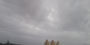

In [18]:
image

In [19]:
im_data = np.asarray(image)
# crop_image = im_data[:45]
# im = Image.fromarray(crop_image)

In [20]:
im = image

In [21]:
# 데이터를 하나의 배열로 정리
image_dataset = []
for row in im_data:
    for item in row:
        image_dataset.append(item)
image_dataset = np.array(image_dataset)

In [22]:
df = pd.DataFrame(image_dataset, columns=['red','green','blue'])

In [25]:
from sklearn.cluster import DBSCAN

# create model and prediction
# model = DBSCAN(eps=1, min_samples=5)
model = DBSCAN(eps=3, min_samples=5)
predict = pd.DataFrame(model.fit_predict(df))
predict.columns = ['predict']

# concatenate labels to df as a new column
r = pd.concat([df,predict],axis=1)

In [26]:
len(set(r['predict']))

5

In [28]:
data = r